In [28]:
import os
import sys
import time
import numpy as np
from PIL import Image 
import cv2
import pickle
import matplotlib.pyplot as plt 
from keras import layers
from keras import models
from keras import optimizers


In [3]:
test_dir = 'test'
image_path = '5.jpg'
original_dataset = 'cats_dogs_dataset'
base_dir = 'data'

In [4]:
images_path = os.path.join(original_dataset, 'train')

def dataPreloader(path, file_name):
    ready_names = list()
    X = list()
    Y = list()


    for item in os.listdir(path):

        name = item.split('.')[0]
        if name not in ready_names:
            meta_name = name + '.txt'
            image_name = name + '.jpg'

            full_image_path = os.path.join(images_path, image_name)
            full_meta_path = os.path.join(images_path, meta_name)

            image_array = preprocessorImage(full_image_path)
            image_meta = getMeta(full_meta_path)
            
            X.append(image_array)
            Y.append(image_meta)
            
            ready_names.append(name)
    X = np.array(X)
    Y = np.array(Y)
    
    with open(file_name+'_X.pickle', 'wb') as file:
        pickle.dump(X, file)
        
    with open(file_name+'_Y.pickle', 'wb') as file:
        pickle.dump(Y, file)
    
    return 0


In [9]:
dataPreloader(images_path, 'cat_dog_train')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fe1803090d0> (for post_execute):


KeyboardInterrupt: 

In [8]:
def preprocessorImage(path):
    new_size = (100, 100)
    image = cv2.imread(image_path)
    img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    img_gray = img_gray / 255.
    img = cv2.resize(img_gray, new_size) 
    plt.imshow(img)
    return img
    
def getMeta(path):
    with open(path, 'r') as f:
        meta = f.readlines()[0]
        meta = np.array(meta.split(' '), dtype='int')
    return meta

In [11]:
with open('train_cd_x_X.pickle', 'rb') as f:
    CD_X = pickle.load(f)
with open('train_cd_x_Y.pickle', 'rb') as f:
    CD_Y = pickle.load(f)

In [17]:
Y = CD_Y[:,0]
YY = CD_Y

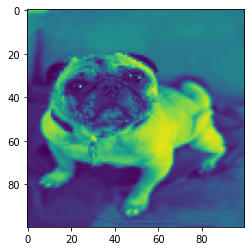

In [19]:
plt.imshow(CD_X[1])

In [20]:
data_path_1 = 'train_cd_x_X.pickle'
data_path_2 = 'train_cd_x_Y.pickle'

In [21]:
with open(data_path_1, 'rb') as d: 
    data = pickle.load(d)
    

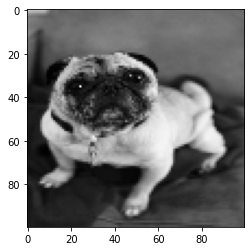

In [22]:
plt.imshow(data[1], cmap='gray')

In [36]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=XX.shape[1:]))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)        

In [26]:
Y = Y - 1

In [29]:
X = CD_X

0


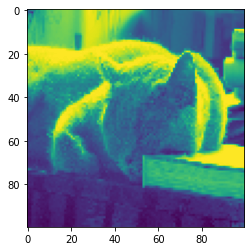

In [30]:
print(Y[149])
plt.imshow(X[149])

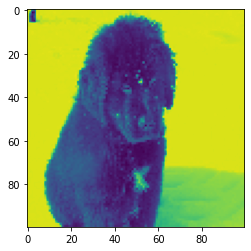

In [32]:
plt.imshow(X[10])

In [35]:
X.shape
XX = X.reshape(2985, 100, 100, 1)

In [34]:
Y.shape

(2985,)

In [38]:
model.fit(XX, Y, epochs=50)

Epoch 1/50
94/94 [==============================] - 31s 288ms/step - loss: 0.6215 - acc: 0.6827
Epoch 2/50
94/94 [==============================] - 26s 281ms/step - loss: 0.5841 - acc: 0.7068
Epoch 3/50
94/94 [==============================] - 27s 282ms/step - loss: 0.5950 - acc: 0.6905
Epoch 4/50
94/94 [==============================] - 30s 323ms/step - loss: 0.5818 - acc: 0.6914
Epoch 5/50
94/94 [==============================] - 35s 369ms/step - loss: 0.5601 - acc: 0.7093
Epoch 6/50
94/94 [==============================] - 38s 402ms/step - loss: 0.5587 - acc: 0.7045
Epoch 7/50
94/94 [==============================] - 38s 408ms/step - loss: 0.5399 - acc: 0.7346
Epoch 8/50
94/94 [==============================] - 39s 420ms/step - loss: 0.5395 - acc: 0.7330
Epoch 9/50
94/94 [==============================] - 39s 412ms/step - loss: 0.5026 - acc: 0.7644
Epoch 10/50
94/94 [==============================] - 38s 409ms/step - loss: 0.4660 - acc: 0.7800
Epoch 11/50
94/94 [====================

In [42]:
model.save('cats_dogs_dataset.h5')

In [56]:
from imagepacker import preprocessor_image

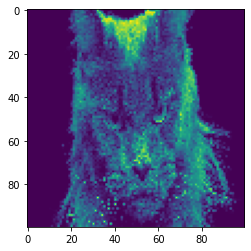

In [57]:
image = preprocessor_image('3.jpg', (100, 100), True)

In [53]:
image = image.reshape((100, 100, 1))
x = np.array([image])


In [54]:
model.predict(x)

array([[0.17701852]], dtype=float32)